In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
ann_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(x_train_flat.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=3,            # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights after stopping
)

In [ ]:
history_ann = ann_model.fit(x_train_flat, y_train, epochs=20,
                            validation_data=(x_test_flat, y_test),
                            callbacks=[early_stopping],         # Add EarlyStopping callback
                             batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.2856 - loss: 1.9977 - val_accuracy: 0.3472 - val_loss: 1.7732
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 23ms/step - accuracy: 0.3881 - loss: 1.6890 - val_accuracy: 0.4218 - val_loss: 1.6187
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4222 - loss: 1.6000 - val_accuracy: 0.4463 - val_loss: 1.5599
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.4465 - loss: 1.5399 - val_accuracy: 0.4318 - val_loss: 1.5897
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4568 - loss: 1.5141 - val_accuracy: 0.4561 - val_loss: 1.5217
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4717 - loss: 1.4795 - val_accuracy: 0.4616 - val_loss: 1.5143
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.4795 - loss: 1.4540 - val_accuracy: 0.4636 - val_loss: 1.5084
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.4839 -

In [ ]:
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test_flat, y_test)
print(f"ANN Test accuracy: {ann_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4864 - loss: 1.4360
ANN Test accuracy: 0.4902


In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history_cnn = cnn_model.fit(x_train, y_train, epochs=20,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3357 - loss: 1.7831 - val_accuracy: 0.5414 - val_loss: 1.2727
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5699 - loss: 1.2095 - val_accuracy: 0.6105 - val_loss: 1.0946
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6340 - loss: 1.0365 - val_accuracy: 0.6479 - val_loss: 0.9957
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6692 - loss: 0.9374 - val_accuracy: 0.6759 - val_loss: 0.9254
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6991 - loss: 0.8539 - val_accuracy: 0.6895 - val_loss: 0.8903
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7193 - loss: 0.7965 - val_accuracy: 0.6962 - val_loss: 0.8689
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7398 - loss: 0.7352 - val_accuracy: 0.6965 - val_loss: 0.8738
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7552 -

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test accuracy: {cnn_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7124 - loss: 0.8458
CNN Test accuracy: 0.7089


In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

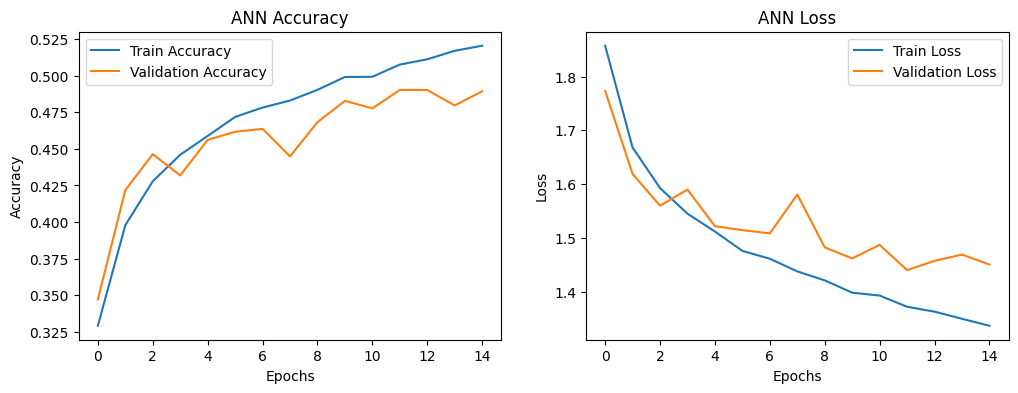

In [ ]:
plot_history(history_ann, 'ANN')

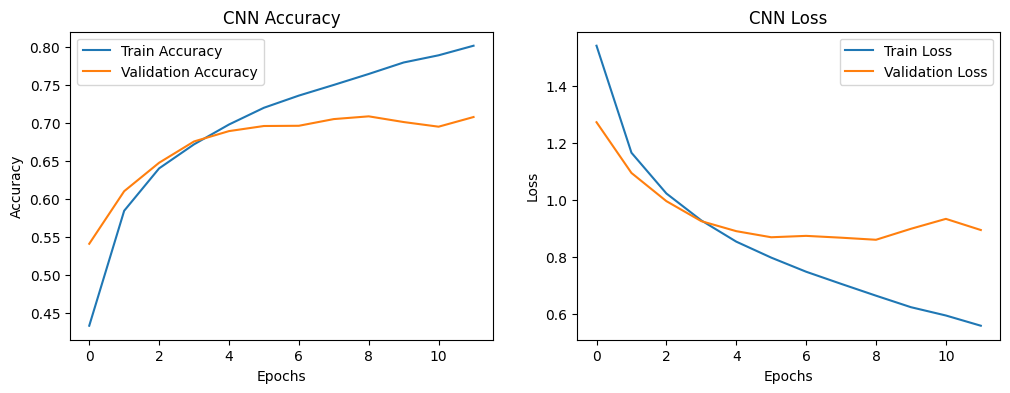

In [ ]:
plot_history(history_cnn, 'CNN')